In [1]:
# On importe les librairies dont on aura besoin pour la Question1
import os
from utils import *
from tsne import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib.pyplot import figure

In [2]:
#------------Task_0: Chargement et normalisation des donnees----------------------------------------#

#chargement des donnee
hdr_data = load_HDR_data()
country_names = hdr_data["country_names"]
data = hdr_data["X"]

data_scaled = preprocessing.scale(data)
data_2D = tsne(data_scaled, perplexity = 5)
data_scaled

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  138 ...
Mean value of sigma:  2.138247902078275
Iteration  10 : error is  16.918561763174782
Iteration  20 : error is  15.206577476554386
Iteration  30 : error is  15.563509446219001
Iteration  40 : error is  14.977855811708675
Iteration  50 : error is  13.937065888839623
Iteration  60 : error is  14.302566963447134
Iteration  70 : error is  15.49603083955536
Iteration  80 : error is  14.404702975619779
Iteration  90 : error is  14.959798699988287
Iteration  100 : error is  15.545415418729323
Iteration  110 : error is  2.4691074825484165
Iteration  120 : error is  1.8425889796910169
Iteration  130 : error is  1.5418957708414367
Iteration  140 : error is  1.2735751282474637
Iteration  150 : error is  1.1724590845431293
Iteration  160 : error is  1.0072985494087139
Iteration  170 : error is  0.8941835687533894
Iteration  180 : error is  0.8404279422015535
Iteration  190 : error is  0.

array([[-1.03635537e+00, -6.65934742e-01, -3.70435382e-01, ...,
         2.44426139e+00, -7.97354834e-01, -7.79256302e-01],
       [-6.14476193e-01, -3.63635418e-01, -3.46825516e-01, ...,
         4.24004528e-01, -7.97354834e-01, -7.79256302e-01],
       [-3.61348687e-01, -1.62102536e-01, -3.65713409e-01, ...,
         1.39672080e+00, -7.97354834e-01, -7.79256302e-01],
       ...,
       [ 7.35537174e-01,  1.75245985e+00, -3.27937623e-01, ...,
        -3.99063085e-01,  4.62026716e-01,  1.94952978e-01],
       [ 3.13657997e-01,  1.14786120e+00,  7.10691196e-02, ...,
        -3.99063085e-01,  1.02293026e-03,  7.40690583e-01],
       [ 1.24179219e+00,  2.05475917e+00, -3.13771703e-01, ...,
        -3.99063085e-01,  3.92554311e-01,  1.16023985e-01]])

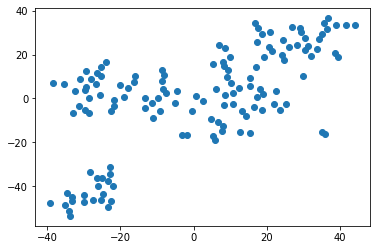

In [3]:
plt.scatter(data_2D[:,0],data_2D[:,1], label='True Position')


In [4]:
#-----------task_1: regroupement des instances en ++ groupes: choix du meilleur clustering-----------------#

#----task_1.1 :essayer plusieurs nombre de clusters et 
#choisir le clustering qui faitle plus de sens pour vous-------------------------------#

#kmeans = KMeans(n_clusters=2, init='k-means++')
#kmeans.fit(data_scaled)

kmeans = KMeans(n_clusters=4)
kmeans.fit(data_2D)

print("Valeur des centre des cluster : les centroïdes \n")
print(kmeans.cluster_centers_) # valeurs des coordonnées centroïdes.

print("\n _____pays associe a chaque centroïdes_____\n")
centroides, index_centroides = find_closest_instances_to_kmeans(data_2D, kmeans)

for i in range(0, len(index_centroides) ):
    na = index_centroides[i]
    print ("*",country_names[na], " : seras le centroïdes associer au Cluter en X \n" )

Valeur des centre des cluster : les centroïdes 

[[ 12.04796082  -2.73314021]
 [-28.35262871 -43.15723339]
 [ 27.09288428  25.75360871]
 [-20.83761089   3.29137074]]

 _____pays associe a chaque centroïdes_____

* Tunisia  : seras le centroïdes associer au Cluter en X 

* Switzerland  : seras le centroïdes associer au Cluter en X 

* Niger  : seras le centroïdes associer au Cluter en X 

* Thailand  : seras le centroïdes associer au Cluter en X 



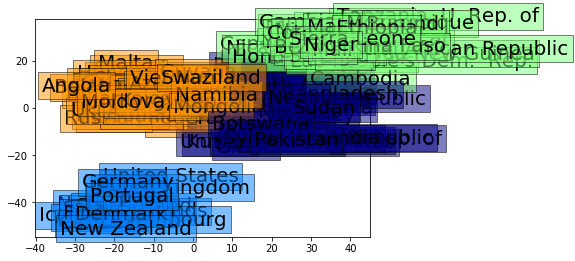

In [5]:
#task_1.2 : affichage du graphe. vous devez réduire la dimensionnalitédes données 
#afin de les visualiser sur l'écran de votre ordinateur.
show_annotated_clustering(data_2D, kmeans.labels_, country_names)



 ##################### __pour k =  2 __ ####################### 
|                                                             |
|             Colombia -> centroïdes associer au Cluter N*: 1 |
|              Albania -> centroïdes associer au Cluter N*: 2 |

 ##################### __pour k =  3 __ ####################### 
|                                                             |
|  Trinidad and Tobago -> centroïdes associer au Cluter N*: 1 |
| Lao People's Dem.  Rep. -> centroïdes associer au Cluter N*: 2 |
|          Switzerland -> centroïdes associer au Cluter N*: 3 |

 ##################### __pour k =  4 __ ####################### 
|                                                             |
|             Thailand -> centroïdes associer au Cluter N*: 1 |
|                Niger -> centroïdes associer au Cluter N*: 2 |
|          Switzerland -> centroïdes associer au Cluter N*: 3 |
|              Tunisia -> centroïdes associer au Cluter N*: 4 |

 ##################### __pour 

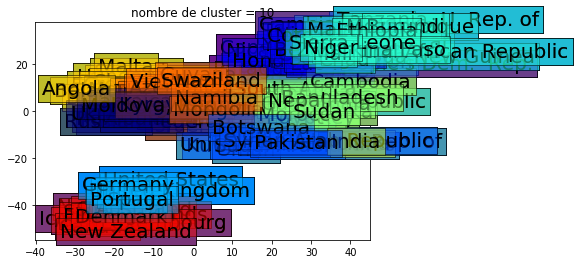

In [6]:
#-------task_2 :Votre deuxième tâche consiste à regrouper les données HDR avec l'algorithme k-means pourk = 2 ... 10 grappes. 
#Choisissez un cluster  (pas assez de grappes, assez de grappes, trop de grappes).puis commenter
k_centroides = {}

SSE = []
for cluster in range(2,11):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_2D)
    SSE.append(kmeans.inertia_)
    
    show_annotated_clustering(data_2D, kmeans.labels_, country_names)
    plt.title("nombre de cluster = "+ str(cluster))
    #plt.savefig('../doc/Graphe/task_1_courbes_apprentissage_avec_max_depth=3.pdf')
    print("\n","#"*21,"__pour k = ", cluster,"__", "#"*23, "\n|"," "*59,"|")
    plt.savefig('../doc/Graphes/'+str(cluster)+'_Means.png')
    
    centroides, index_centroides = find_closest_instances_to_kmeans(data_2D, kmeans)
    for i in range(0, len(index_centroides) ):
        na = index_centroides[i]
        print ("| %20s -> centroïdes associer au Cluter N*:%2s |" %(country_names[na] ,i+1) )
    
    

In [7]:
centroides, index_centroides = find_closest_instances_to_kmeans(data_2D, kmeans)

for i in range(0, len(index_centroides) ):
    na = index_centroides[i]
    print ("*",country_names[na], " : seras le centroïdes associer au Cluter en X \n" )

* Romania  : seras le centroïdes associer au Cluter en X 

* Yemen  : seras le centroïdes associer au Cluter en X 

* Chile  : seras le centroïdes associer au Cluter en X 

* France  : seras le centroïdes associer au Cluter en X 

* Madagascar  : seras le centroïdes associer au Cluter en X 

* Guatemala  : seras le centroïdes associer au Cluter en X 

* China  : seras le centroïdes associer au Cluter en X 

* Croatia  : seras le centroïdes associer au Cluter en X 

* Cyprus  : seras le centroïdes associer au Cluter en X 

* Denmark  : seras le centroïdes associer au Cluter en X 



Text(0, 0.5, 'Inertia')

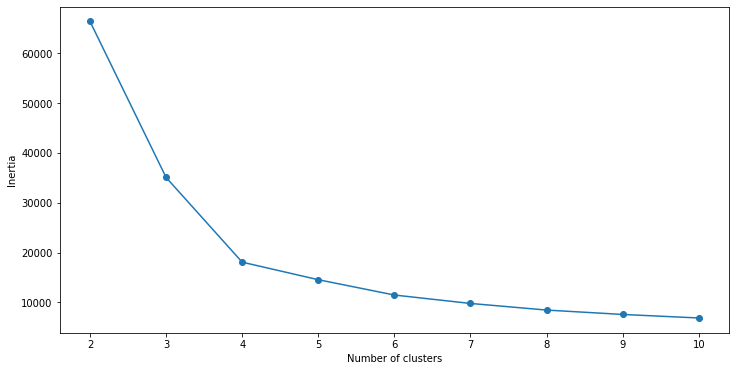

In [8]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(2,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [9]:
color_rgbd=RGB_color(0,1, cmap='jet')
color_rgbd

(0.0, 0.0, 0.5, 1.0)

In [11]:
import numpy as np
import matplotlib
import webcolors
from webcolors import *

nb_clusters = np.max(kmeans.labels_)+1
n, d = data_2D.shape

colore_hex=matplotlib.colors.to_hex( RGB_color(kmeans.labels_[0], nb_clusters) )
color_RGB= hex_to_rgb (colore_hex)


def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

actual_name, colore_name = get_colour_name(color_RGB)

print ("Actual colour name:", actual_name, ", nom de la couleur:", colore_name)

Actual colour name: None , nom de la couleur: red
